         State_UT     year Primary_Boys Primary_Girls Primary_Total  \
0   A & N Islands  2012-13         0.83          0.51          0.68   
1   A & N Islands  2013-14         1.35          1.06          1.21   
2   A & N Islands  2014-15         0.47          0.55          0.51   
3  Andhra Pradesh  2012-13          3.3          3.05          3.18   
4  Andhra Pradesh  2013-14         4.31          4.39          4.35   

  Upper Primary_Boys Upper Primary_Girls Upper Primary_Total Secondary _Boys  \
0     Uppe_r_Primary                1.09                1.23            5.57   
1                 NR                1.54                0.51            8.36   
2               1.44                1.95                1.69           11.47   
3               3.21                3.51                3.36           12.21   
4               3.46                4.12                3.78           11.95   

  Secondary _Girls Secondary _Total HrSecondary_Boys HrSecondary_Girls  \
0             5.55

<ipython-input-1-eb42319a8d48>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


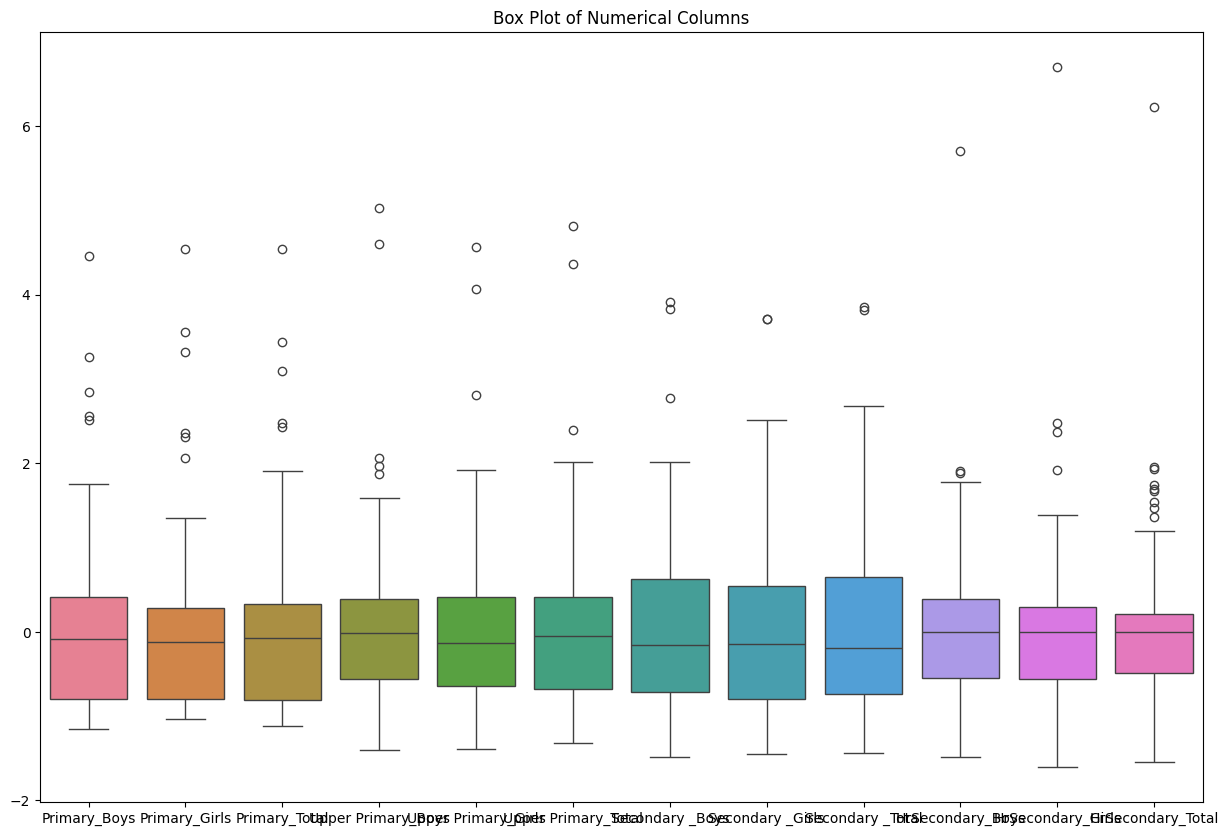

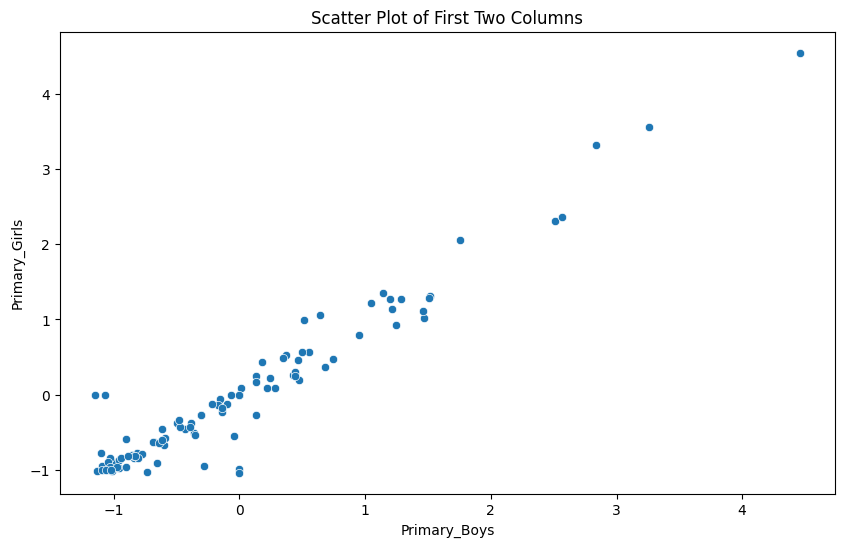

<Figure size 1500x1000 with 0 Axes>

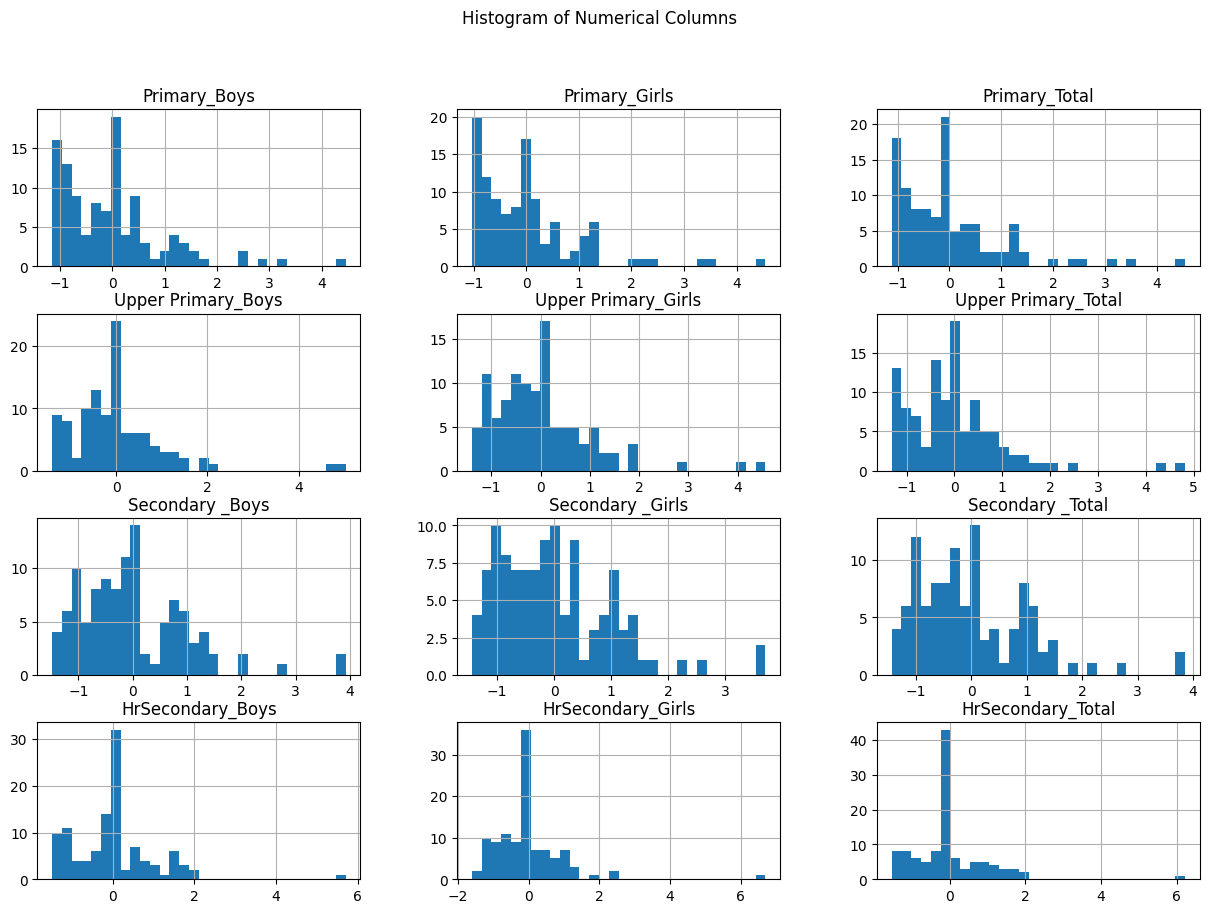

Skewness of each numerical column:
Primary_Boys           1.633790
Primary_Girls          1.855463
Primary_Total          1.763245
Upper Primary_Boys     2.110598
Upper Primary_Girls    1.750826
Upper Primary_Total    1.902942
Secondary _Boys        1.311251
Secondary _Girls       1.141139
Secondary _Total       1.287139
HrSecondary_Boys       1.805674
HrSecondary_Girls      2.917009
HrSecondary_Total      2.265236
dtype: float64

Kurtosis of each numerical column:
Primary_Boys            3.627668
Primary_Girls           4.588182
Primary_Total           4.263136
Upper Primary_Boys      7.899141
Upper Primary_Girls     4.925675
Upper Primary_Total     6.356395
Secondary _Boys         2.643201
Secondary _Girls        1.882457
Secondary _Total        2.402940
HrSecondary_Boys        7.922569
HrSecondary_Girls      16.618370
HrSecondary_Total      11.901461
dtype: float64

Outliers detected in each numerical column:
Primary_Boys           5
Primary_Girls          6
Primary_Total          5

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import skew, kurtosis

# Load dataset
data = pd.read_csv('/content/dropout-ratio-2012-2015.csv')
print(data.head())

# Convert columns to numeric and handle missing values
for column in data.columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')
    data[column].fillna(data[column].mean(), inplace=True)

# Drop categorical columns
data = data.drop(['State_UT', 'year'], axis=1)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# Box plot
plt.figure(figsize=(15, 10))
sns.boxplot(data=data_scaled)
plt.title('Box Plot of Numerical Columns')
plt.show()

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled.iloc[:, 0], y=data_scaled.iloc[:, 1])
plt.title('Scatter Plot of First Two Columns')
plt.show()

# Histogram
plt.figure(figsize=(15, 10))
data_scaled.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histogram of Numerical Columns')
plt.show()

# Skewness and Kurtosis
skewness = data_scaled.apply(lambda x: skew(x))
kurt = data_scaled.apply(lambda x: kurtosis(x))
print("Skewness of each numerical column:")
print(skewness)
print("\nKurtosis of each numerical column:")
print(kurt)

# Detect outliers using IQR method
Q1 = data_scaled.quantile(0.25)
Q3 = data_scaled.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data_scaled < (Q1 - 1.5 * IQR)) | (data_scaled > (Q3 + 1.5 * IQR))).sum()
print("\nOutliers detected in each numerical column:")
print(outliers)

# Train-test split
X = data_scaled.drop('HrSecondary_Total', axis=1)
y = data_scaled['HrSecondary_Total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression R² Score: {r2_lr}")
print(f"Linear Regression Accuracy: {r2_lr * 100:.2f}%")

# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree MSE: {mse_dt}")
print(f"Decision Tree R² Score: {r2_dt}")
print(f"Decision Tree Accuracy: {r2_dt * 100:.2f}%")

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R² Score: {r2_rf}")
print(f"Random Forest Accuracy: {r2_rf * 100:.2f}%")
